![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 4 - Performance Evaluation </center>
### <center> Precision, Recall, ROC, and AUC</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/04_PerformanceEvaluation/MainPrecisionRecall.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size':16})
# np.random.seed(1)

### Generate data:

In [2]:
#-- For colab users:
# !pip install scikit-learn -U

In [3]:
from sklearn.datasets import make_moons

N1        = 950
N2        = 50
mX, vY    = make_moons(n_samples=[N1, N2], noise=.1)
vY[vY==0] = -1
mX.shape, vY.shape

((1000, 2), (1000,))

### Plot data:

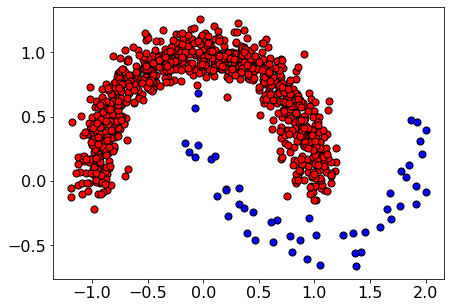

In [4]:
vIdx0 = vY == -1

plt.figure (figsize=(7, 5))
plt.scatter(mX[ vIdx0,0], mX[ vIdx0,1], s=50, c='r', edgecolor='k')
plt.scatter(mX[~vIdx0,0], mX[~vIdx0,1], s=50, c='b', edgecolor='k')
plt.show   ()

### Train SVM classifier:

In [5]:
from sklearn.svm import SVC

oSVM  = SVC(kernel='linear').fit(mX, vY)
oSVM.score(mX, vY)

0.974

### Plot decision boundary:

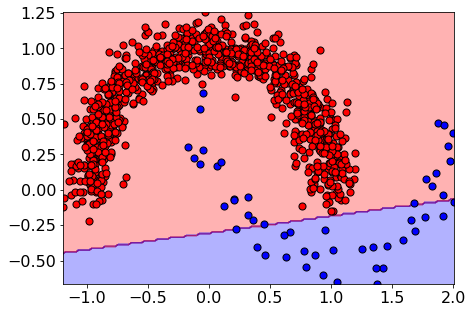

In [6]:
#-- make grid for plot:
v0       = np.linspace(mX[:,0].min(), mX[:,0].max(), 150)
v1       = np.linspace(mX[:,1].min(), mX[:,1].max(), 150)
XX0, XX1 = np.meshgrid(v0, v1)
XX       = np.c_[XX0.ravel(), XX1.ravel()]

Z = oSVM.predict(XX)
Z = Z.reshape(XX0.shape)

plt.figure  (figsize=(7, 5))
plt.contourf(XX0, XX1, Z, colors=['red', 'blue'], alpha=0.3)
plt.scatter (mX[vIdx0,0],  mX[vIdx0,1],  s=50, c='r', edgecolor='k')
plt.scatter (mX[~vIdx0,0], mX[~vIdx0,1], s=50, c='b', edgecolor='k')
plt.show    ()

### Compute precision, recall, and f1 score

In [7]:
from sklearn.metrics import precision_recall_fscore_support

vHatY                    = oSVM.predict(mX)
precision, recall, f1, _ = precision_recall_fscore_support(vY, vHatY, pos_label=1, average='binary')

print(f'Precision = {precision}')
print(f'Recall    = {recall}'   )
print(f'f1        = {f1}'       )

Precision = 1.0
Recall    = 0.48
f1        = 0.6486486486486487


### Plot ROC and AUC:

In [8]:
from sklearn.metrics import roc_curve, auc

vScore         = oSVM.decision_function(mX)
vFP, vTP, vThr = roc_curve(vY, vScore, pos_label=1)
AUC            = auc(vFP, vTP)
AUC

0.9489052631578947

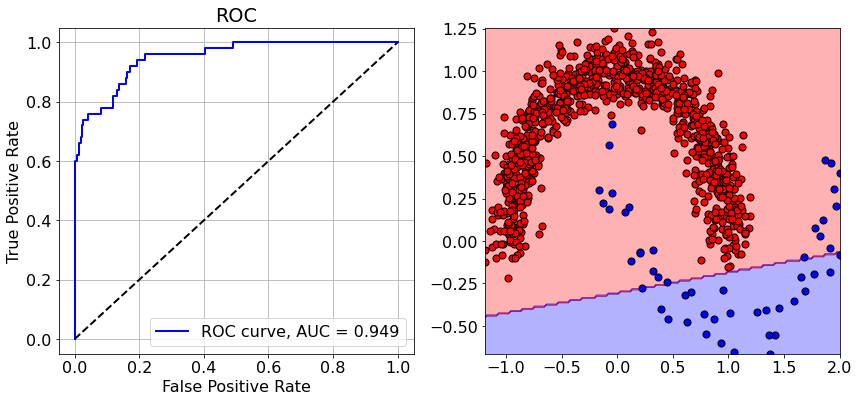

In [9]:
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
plt.plot   (vFP,    vTP,    color='b', lw=2, label=f'ROC curve, AUC = {AUC:.3f}')
plt.plot   ([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title  ('ROC')
plt.grid   ()
plt.legend ()

plt.subplot (1,2,2);
plt.contourf(XX0, XX1, Z, colors=['red', 'blue'], alpha=0.3)
plt.scatter (mX[ vIdx0,0], mX[ vIdx0,1], s=50, c='r', edgecolor='k')
plt.scatter (mX[~vIdx0,0], mX[~vIdx0,1], s=50, c='b', edgecolor='k')
# plt.axis('equal')

plt.show()

In [10]:
from ipywidgets import interact, IntSlider, Layout

vScore = oSVM.decision_function(XX)
mScore = vScore.reshape(XX0.shape)

def PlotRoc(idx):
    _, vAx = plt.subplots(1, 2, figsize=(14, 6))
    ax     = vAx[0]
    ax.plot      (vFP,    vTP,    color='b', lw=3, label=f'AUC = {AUC :.3f}')
    ax.plot      ([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    ax.axvline   (x=vFP[idx],     color='g', lw=2, linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title ('ROC' f'\n$\\alpha = {vThr[idx]}$')
    ax.axis      ('equal')
    ax.legend    ()
    ax.grid      ()    
    
    Z  = mScore > vThr[idx]
    ax = vAx[1]
    ax.contourf(XX0, XX1, Z, colors=['red', 'blue'], alpha=0.3, levels=[0, 0.5, 1.0])
    ax.scatter (mX[ vIdx0,0], mX[ vIdx0,1], s=50, c='r', edgecolor='k')
    ax.scatter (mX[~vIdx0,0], mX[~vIdx0,1], s=50, c='b', edgecolor='k')
#     ax.axis('equal')
    
idxSlider = IntSlider(min=0, max=len(vThr), step=1, value=0, layout=Layout(width='80%'))
interact(PlotRoc, idx=idxSlider)

plt.tight_layout()
plt.show        ()

interactive(children=(IntSlider(value=0, description='idx', layout=Layout(width='80%'), max=42), Output()), _d…

<Figure size 432x288 with 0 Axes>

### Exercise
1.
* Use the breast cancer dataset: `load_breast_cancer`.
* Use a linear SVM classifier.
* Use cross-validation to find the optimal value of $C$ which maximizes the AUC. 
    * Use the `cross_val_predict` with `method='decision_function'`.
    * Use 'roc_auc_score' to compute the AUC.
    
2.
* Split the data into 80% train and 20% validation.
    * You may use `sklearn.model_selection.train_test_split`
* Retrain your classifier on the train set (with the optimal hyper-parameters).
* Plot the ROC (and AUC) on the validation set.

In [12]:
from sklearn.datasets import load_breast_cancer

dData = load_breast_cancer()
mX    = dData.data
vY    = dData.target

#-- Normalize data:
mX = mX - np.mean(mX, axis=0)
mX = mX / np.std (mX, axis=0)

In [11]:
import pandas as pd
from   sklearn.model_selection import cross_val_predict, KFold
from   sklearn.metrics         import roc_auc_score

dRes   = pd.DataFrame(columns=['C', 'AUC'])
oKFold = KFold(25, shuffle=True, random_state=0)

for C in ???:
    vScore              = cross_val_predict(???, cv=oKFold, method=???) 
    dRes.loc[len(dRes)] = [C, roc_auc_score(???)]

dRes.sort_values(by='AUC', ascending=False)

SyntaxError: invalid syntax (<ipython-input-11-677aaa09aa94>, line 8)

In [22]:
from sklearn.model_selection import train_test_split

#-- Split data:
???

#-- Train the optimal classifier:
oSVM = ???

SyntaxError: invalid syntax (<ipython-input-22-7eb658046f92>, line 7)

In [23]:
vScore       = oSVM.decision_function(mTestX)
vFP, vTP, _  = roc_curve(vTestY, vScore, pos_label=1)
AUC          = auc(vFP, vTP)
AUC

0.9950142450142451

No handles with labels found to put in legend.


Object `?` not found.
Object `?` not found.


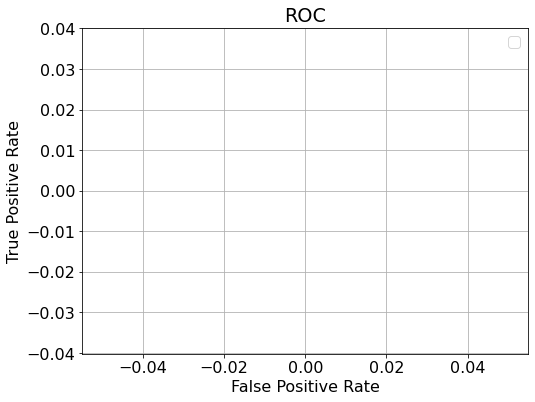

In [25]:
#-- Plot the ROC
plt.figure(figsize=(8, 6))
???
???
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title ('ROC')
plt.axis  ('equal')
plt.legend()
plt.grid  ()
plt.show  ()

### Extra:
Implement your own `ComputeAUC` function.  
* The input is the ROC curve as obtained by the `roc_curve` funcdtion.
* Make sure the output matches the `auc` function.
* Should take between 1-3 lines of code

**Note:** The AUC can also be directly computed using `sklearn.metrics.roc_auc_score`.

In [26]:
def ComputeAUC(vFP, vTP):
    ???

In [27]:
error = ComputeAUC(vFP, vTP) - auc(vFP, vTP)
error

Object `?` not found.


TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'